In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('data/musicgenre.csv')

# Handle missing values
df = df.dropna(subset=['music_genre'])
df = df.replace("?", None).dropna()

# Encode categorical features
encoder = LabelEncoder()
df['music_genre'] = encoder.fit_transform(df['music_genre'])
df['key'] = encoder.fit_transform(df['key'])
df['mode'] = encoder.fit_transform(df['mode'])
df.head()

# Scale the features
df["duration_ms"] = df["duration_ms"] / 1000

# Drop irrelevant columns
df.drop(['track_name', 'instance_id', 'obtained_date', 'artist_name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop(columns=['music_genre'])
y = df['music_genre']
X.head()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Training Logistic Regression (L1, max_iter=100)...
Logistic Regression (L1, max_iter=100) Model
Accuracy: 0.5027395231748852
              precision    recall  f1-score   support

           0       0.39      0.26      0.31      1349
           1       0.60      0.58      0.59      1349
           2       0.48      0.39      0.43      1341
           3       0.74      0.82      0.78      1350
           4       0.41      0.59      0.48      1346
           5       0.53      0.57      0.55      1340
           6       0.44      0.49      0.46      1356
           7       0.44      0.37      0.40      1356
           8       0.45      0.30      0.36      1351
           9       0.49      0.66      0.57      1368

    accuracy                           0.50     13506
   macro avg       0.50      0.50      0.49     13506
weighted avg       0.50      0.50      0.49     13506

------------------------------------------------------------
Training Logistic Regression (L2, max_iter=100)...
Logi

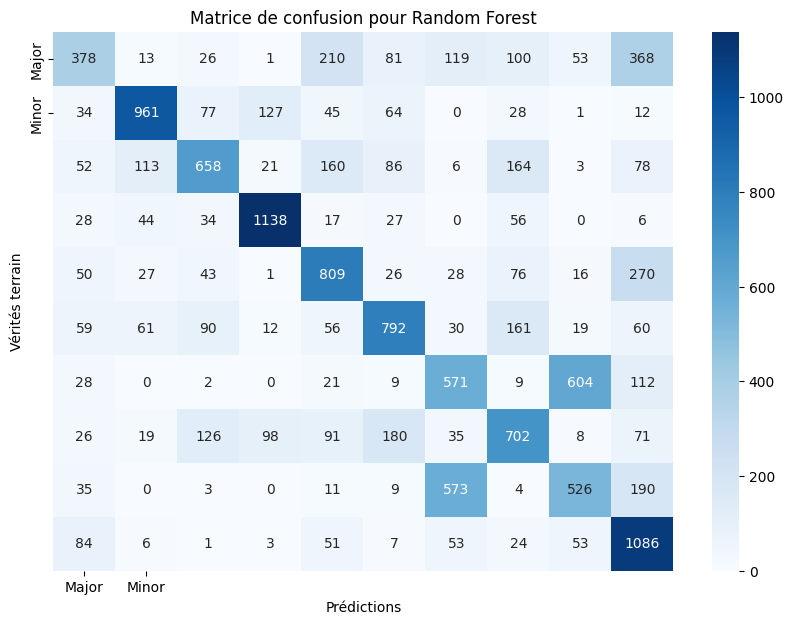

In [2]:
# Définir les modèles à tester
models = {
    "Logistic Regression (L1, max_iter=100)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=100),
    "Logistic Regression (L2, max_iter=100)": LogisticRegression(penalty='l2', solver='liblinear', max_iter=100),
    "Logistic Regression (L1, max_iter=200)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=200),
    "Logistic Regression (L2, max_iter=200)": LogisticRegression(penalty='l2', solver='liblinear', max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42),
}

# Entraîner et évaluer chaque modèle
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": accuracy,
        "report": report
    }
    print(f"{name} Model")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Comparer les performances des modèles
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    for label, metrics in result['report'].items():
        if isinstance(metrics, dict):
            metrics_str = ", ".join([f"{key}: {value:.2f}" for key, value in metrics.items()])
            print(f"  {label}: {metrics_str}")
    print("-" * 60)

# Visualisation de la matrice de confusion pour le meilleur modèle
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title(f'Matrice de confusion pour {best_model_name}')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title(f'Matrice de confusion pour {best_model_name}')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()